<a href="https://colab.research.google.com/github/arshadkumar/grade-calculation/blob/main/sentiment_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# load
df = pd.read_csv("twitter_training.csv")
df.head()


,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
df.info()
df['sentiment'].value_counts()   # adjust column name; examine labels
df['text'].str.len().describe()
sns.countplot(x='sentiment', data=df)    # gives class balance
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46294 entries, 0 to 46293
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   46294 non-null  int64 
 1   Borderlands                                            46294 non-null  object
 2   Positive                                               46294 non-null  object
 3   im getting on borderlands and i will murder you all ,  45849 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


KeyError: 'sentiment'

In [ ]:
# load with no header, since the file has mixed format
df = pd.read_csv("twitter_training.csv", header=None)

# rename columns properly
df.columns = ["id", "entity", "sentiment", "text"]

df.head()


,id,entity,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
# Count of each sentiment
print(df['sentiment'].value_counts())

# Average tweet length
print(df['text'].str.len().describe())

# Plot sentiment distribution
sns.countplot(x='sentiment', data=df, palette="Set2")
plt.title("Sentiment Distribution")
plt.show()


NameError: name 'df' is not defined

In [ ]:
print("columns:", list(df.columns))
print(df.shape)


columns: ['id', 'entity', 'sentiment', 'text']
(74682, 4)


In [ ]:
import re
import nltk
import pandas as pd

# Download stopwords (first time only)
nltk.download("stopwords", quiet=True)
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

# Define cleaning function
def clean_text(txt):
    if pd.isna(txt):        # handle NaN
        return ""
    txt = str(txt).lower()  # lowercase
    txt = re.sub(r'http\S+', '', txt)            # remove URLs
    txt = re.sub(r'[^a-z\s]', ' ', txt)          # keep only letters
    tokens = [w for w in txt.split() if w not in stop_words]
    return " ".join(tokens)

# Apply cleaning and save to new column
df["clean_text"] = df["text"].apply(clean_text)

# Check 5 random rows
df[["text", "clean_text"]].sample(5)


,text,clean_text
41897,A Secret to Battlefield 12 player Wolfman_HD_Y...,secret battlefield player wolfman hd yt see id...
52354,x I painted my favorite location in Red Dead R...,x painted favorite location red dead redemptio...
35153,Any teacher can take on this important role wi...,teacher take important role without knowing ch...
56215,@ Rainbow6Game @ SpearheadBeer best combinatio...,rainbow game spearheadbeer best combination en...
34743,going to launch a TwitLonger explaining why I ...,going launch twitlonger explaining might quit ...


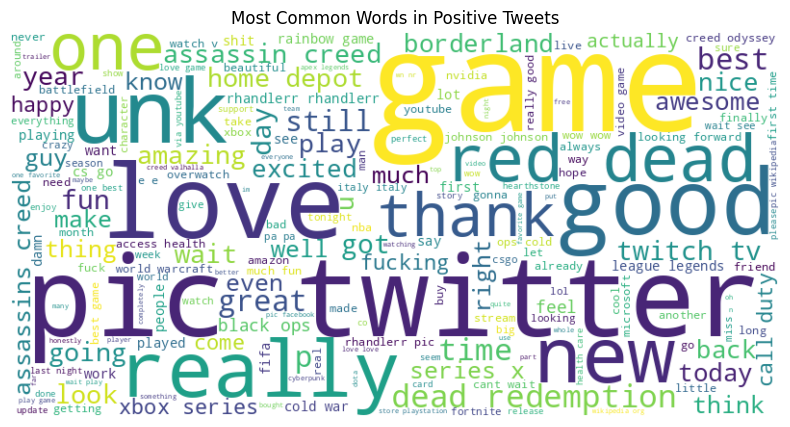

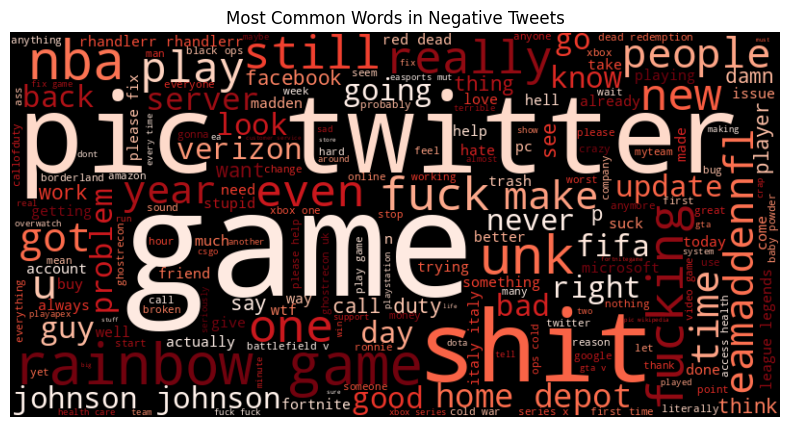

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Positive tweets wordcloud
positive_text = " ".join(df[df["sentiment"]=="Positive"]["clean_text"])
wordcloud_pos = WordCloud(width=800, height=400, background_color="white").generate(positive_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Positive Tweets")
plt.show()

# Negative tweets wordcloud
negative_text = " ".join(df[df["sentiment"]=="Negative"]["clean_text"])
wordcloud_neg = WordCloud(width=800, height=400, background_color="black", colormap="Reds").generate(negative_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Negative Tweets")
plt.show()


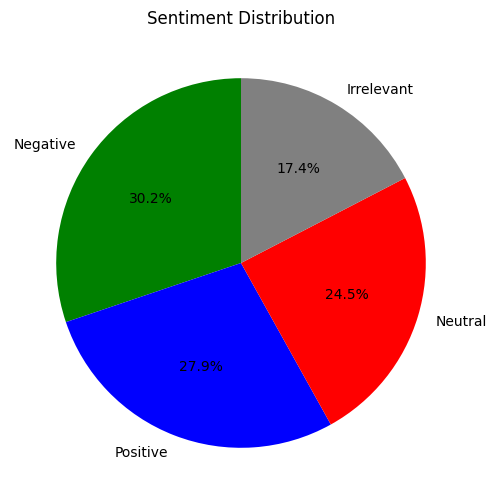

In [ ]:
plt.figure(figsize=(6,6))
df["sentiment"].value_counts().plot.pie(
    autopct="%1.1f%%",
    colors=["green", "blue", "red", "gray"],
    startangle=90
)
plt.title("Sentiment Distribution")
plt.ylabel("")
plt.show()


In [ ]:
from collections import Counter

def get_top_words(sentiment, n=10):
    words = " ".join(df[df["sentiment"]==sentiment]["clean_text"]).split()
    return Counter(words).most_common(n)

print("Top Positive words:", get_top_words("Positive"))
print("Top Negative words:", get_top_words("Negative"))
print("Top Neutral words:", get_top_words("Neutral"))


Top Positive words: [('game', 2479), ('com', 1986), ('love', 1791), ('good', 1624), ('pic', 1395), ('like', 1362), ('really', 1292), ('twitter', 1217), ('new', 1209), ('best', 1125)]
Top Negative words: [('game', 4707), ('k', 2015), ('com', 1922), ('get', 1668), ('like', 1642), ('shit', 1528), ('twitter', 1434), ('pic', 1381), ('fix', 1315), ('fuck', 1278)]
Top Neutral words: [('com', 4239), ('johnson', 1914), ('game', 1437), ('amazon', 1389), ('facebook', 1004), ('google', 922), ('like', 917), ('twitter', 907), ('pic', 903), ('new', 893)]


Extension: Twitter Sentiment Chatbot (MS Project Part)

In [3]:
import pandas as pd
import re
from nltk.corpus import stopwords

# Load dataset again
df = pd.read_csv("twitter_training.csv", header=None)

# Rename columns properly
df.columns = ["id", "entity", "sentiment", "text"]

# Define stopwords
stop_words = set(stopwords.words("english"))

# Cleaning function
def clean_text(txt):
    if pd.isna(txt):
        return ""
    txt = str(txt).lower()
    txt = re.sub(r'http\S+', '', txt)  # remove links
    txt = re.sub(r'[^a-z\s]', '', txt)  # keep only letters
    tokens = [w for w in txt.split() if w not in stop_words]
    return " ".join(tokens)

# Apply cleaning
df["clean_text"] = df["text"].apply(clean_text)

print(df.head())


LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [4]:
# Full pipeline: reload dataset, ensure stopwords, clean, train, evaluate, save
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text as sk_text
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import joblib
import warnings
warnings.filterwarnings("ignore")

# ---------- 1) Load dataset ----------
# adjust filename if needed; your file in Colab files pane is "twitter_training.csv"
df = pd.read_csv("twitter_training.csv", header=None)

# Rename columns (this dataset had no header)
df.columns = ["id", "entity", "sentiment", "text"]
print("Loaded:", df.shape)
print("Columns:", list(df.columns))

# ---------- 2) Ensure stopwords available (NLTK) with sklearn fallback ----------
try:
    # try to find the resource; if not present, download
    nltk.data.find("corpora/stopwords")
except LookupError:
    print("NLTK stopwords not found — downloading now...")
    nltk.download("stopwords")

# build stop_words set, fallback to sklearn's english stopwords if anything fails
try:
    stop_words = set(stopwords.words("english"))
    print("Using NLTK stopwords (count):", len(stop_words))
except Exception as e:
    print("NLTK stopwords not available, falling back to sklearn's ENGLISH_STOP_WORDS.")
    stop_words = set(sk_text.ENGLISH_STOP_WORDS)
    print("Using sklearn stopwords (count):", len(stop_words))

# ---------- 3) Text cleaning function ----------
def clean_text(txt):
    # safe conversion and handle NaN
    if pd.isna(txt):
        return ""
    txt = str(txt).lower()
    txt = re.sub(r'http\S+', ' ', txt)            # remove URLs
    txt = re.sub(r'[^a-z\s]', ' ', txt)           # keep only letters + spaces
    tokens = [w for w in txt.split() if (w and w not in stop_words)]
    return " ".join(tokens)

# Apply cleaning and create column
df["clean_text"] = df["text"].apply(clean_text)

# Quick sanity check
print("\nExample rows after cleaning:")
display(df[["text", "clean_text"]].sample(5))

# ---------- 4) Prepare X, y ----------
# Ensure labels are strings
X = df["clean_text"].astype(str).values
y = df["sentiment"].astype(str).values
print("Prepared X,y — samples:", X.shape[0])

# ---------- 5) Vectorize (TF-IDF) ----------
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))  # 1-2 grams useful for tweets
X_vec = tfidf.fit_transform(X)
print("TF-IDF matrix shape:", X_vec.shape)

# ---------- 6) Train/test split ----------
X_train, X_test, y_train, y_test = train_test_split(
    X_vec, y, test_size=0.2, random_state=42, stratify=y
)
print("Train/test sizes:", X_train.shape[0], X_test.shape[0])

# ---------- 7) Train classifier ----------
clf = LogisticRegression(max_iter=1000, C=1.0, class_weight="balanced", random_state=42)
clf.fit(X_train, y_train)

# ---------- 8) Evaluate ----------
y_pred = clf.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))

# ---------- 9) Save model & vectorizer ----------
joblib.dump(tfidf, "tfidf_vectorizer.joblib")
joblib.dump(clf, "sentiment_clf.joblib")
print("\nSaved: tfidf_vectorizer.joblib, sentiment_clf.joblib")

# Done


Loaded: (74682, 4)
Columns: ['id', 'entity', 'sentiment', 'text']
NLTK stopwords not found — downloading now...


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Using NLTK stopwords (count): 198

Example rows after cleaning:


,text,clean_text
13901,friends finally showed their love and gave me ...,friends finally showed love gave k vc
29329,"Fuck it, this current goes on all day.",fuck current goes day
30697,End of story.,end story
57481,My Longest Rainbow Six Siege Game [Khabib is s...,longest rainbow six siege game khabib still yo...
10308,Too bad the Xbox Series X won't have any Xbox ...,bad xbox series x xbox game studios exclusives...


Prepared X,y — samples: 74682
TF-IDF matrix shape: (74682, 5000)
Train/test sizes: 59745 14937

Accuracy: 0.683269732878088

Classification report:
               precision    recall  f1-score   support

  Irrelevant       0.52      0.72      0.60      2598
    Negative       0.78      0.73      0.75      4509
     Neutral       0.69      0.62      0.65      3664
    Positive       0.73      0.67      0.70      4166

    accuracy                           0.68     14937
   macro avg       0.68      0.68      0.68     14937
weighted avg       0.70      0.68      0.69     14937


Saved: tfidf_vectorizer.joblib, sentiment_clf.joblib


In [5]:
# --- Load model & vectorizer ---
import joblib

tfidf = joblib.load("tfidf_vectorizer.joblib")
clf = joblib.load("sentiment_clf.joblib")

# Helper to clean new text (reuse same clean_text function)
def chatbot_reply(message):
    cleaned = clean_text(message)
    vec = tfidf.transform([cleaned])
    sentiment = clf.predict(vec)[0]

    # Define response rules
    if sentiment == "Positive":
        reply = "😄 Glad you feel that way! You're awesome! 🚀"
    elif sentiment == "Negative":
        reply = "😔 Sorry you feel like this... Stay strong 💙"
    elif sentiment == "Neutral":
        reply = "👌 Got it. Thanks for sharing!"
    else:  # Irrelevant
        reply = "🤔 Hmm, not sure how to respond to that."

    return sentiment, reply

# --- Test chatbot ---
tests = [
    "I love this new update, it's amazing!",
    "This app is useless and I hate it.",
    "The service was okay, nothing special.",
    "asdfghjkl just random stuff"
]

for t in tests:
    s, r = chatbot_reply(t)
    print(f"User: {t}\nSentiment: {s}\nBot: {r}\n")


User: I love this new update, it's amazing!
Sentiment: Positive
Bot: 😄 Glad you feel that way! You're awesome! 🚀

User: This app is useless and I hate it.
Sentiment: Negative
Bot: 😔 Sorry you feel like this... Stay strong 💙

User: The service was okay, nothing special.
Sentiment: Neutral
Bot: 👌 Got it. Thanks for sharing!

User: asdfghjkl just random stuff
Sentiment: Neutral
Bot: 👌 Got it. Thanks for sharing!



In [6]:
# --- Interactive chatbot loop ---
while True:
    user_input = input("You: ")
    if user_input.lower() in ["quit", "exit", "bye"]:
        print("Bot: Goodbye! 👋")
        break

    sentiment, reply = chatbot_reply(user_input)
    print(f"Sentiment: {sentiment}")
    print(f"Bot: {reply}\n")


You: hey love you
Sentiment: Irrelevant
Bot: 🤔 Hmm, not sure how to respond to that.

You: ill kill you basturd
Sentiment: Positive
Bot: 😄 Glad you feel that way! You're awesome! 🚀

You: what the fuck 
Sentiment: Negative
Bot: 😔 Sorry you feel like this... Stay strong 💙



KeyboardInterrupt: Interrupted by user

In [7]:
dangerous_words = ["kill", "murder", "suicide", "die"]

def chatbot_reply(user_input):
    # Rule-based check first
    if any(word in user_input.lower() for word in dangerous_words):
        return "⚠️ That sounds dangerous. Please reach out for help or avoid harmful talk.", "Alert"

    # Else use ML model prediction
    vec = tfidf.transform([user_input])
    sentiment = clf.predict(vec)[0]

    if sentiment == "Positive":
        reply = "😄 Glad you feel that way! You're awesome! 🚀"
    elif sentiment == "Negative":
        reply = "😔 Sorry you feel like this... Stay strong 💙"
    else:
        reply = "👌 Got it. Thanks for sharing!"

    return sentiment, reply


In [8]:
# === Reply banks + improved chatbot_reply with random variation ===
import random

# Reply banks
REPLIES = {
    "Positive": [
        "😄 Love that — thanks for sharing! Want to add more?",
        "🎉 Awesome to hear! You're awesome! 🚀",
        "😁 Glad you're enjoying this — tell me more!",
        "🤩 Great! Happy to hear that."
    ],
    "Negative": [
        "😔 I'm sorry to hear that. Do you want to talk more about it?",
        "💙 That sounds rough — I'm here to listen.",
        "😕 Sorry you're experiencing that. Anything I can help with?",
        "😢 That doesn't sound good. I'm here if you want to share."
    ],
    "Neutral": [
        "👌 Got it. Thanks for the note!",
        "👍 Understood — thanks for sharing.",
        "🙂 Noted. Anything else?"
    ],
    "Irrelevant": [
        "🤔 Hmm, not sure how to respond — could you clarify?",
        "🙃 That seems off-topic. Want to rephrase?",
        "😅 I'm not sure what to say to that."
    ],
    "Uncertain": [
        "🤖 I'm not certain what you mean — could you say that another way?",
        "😅 Sorry, I didn't quite get that. Can you rephrase?"
    ],
    "Alert": [
        "⚠️ That sounds dangerous. If someone is in immediate danger, contact local emergency services now. If this is self-harm, please reach out to a crisis line or a trusted person."
    ],
    "Threat": [
        "⚠️ I noticed threatening language. Please avoid threats — if someone is unsafe, seek help."
    ]
}

# small helper to pick a reply by label and optionally include confidence note
def pick_reply(label, confidence=1.0):
    label_key = label
    # normalize possible variations
    if label.lower().startswith("pos"): label_key = "Positive"
    elif label.lower().startswith("neg"): label_key = "Negative"
    elif label.lower().startswith("irr"): label_key = "Irrelevant"
    elif label.lower().startswith("unc") or confidence < 0.45: label_key = "Uncertain"
    elif label_key not in REPLIES:
        label_key = "Neutral"
    reply = random.choice(REPLIES[label_key])
    # add small confidence hint if low
    if confidence < 0.5 and label_key != "Uncertain":
        reply = f"{reply} (I might be unsure about this — confidence {confidence:.2f})"
    return reply

# We'll override chatbot_reply to use pick_reply and preserve previous safety checks.
def chatbot_reply_with_banks(user_input):
    is_danger, severity = check_dangerous(user_input)   # uses your earlier function
    if is_danger:
        if severity == "high":
            label = "Alert"
            reply = pick_reply("Alert")
            return label, reply, 1.0, True
        else:
            label = "Threat"
            reply = pick_reply("Threat")
            return label, reply, 0.9, True

    # Model prediction (with confidence)
    pred_label, conf = model_predict_with_confidence(user_input)  # uses earlier helper

    # If low confidence -> uncertain
    if conf < 0.45:
        label = "Uncertain"
        reply = pick_reply(label, conf)
        return label, reply, conf, False

    # Choose reply from bank
    reply = pick_reply(pred_label, conf)
    return pred_label, reply, conf, False

# Replace the bot function in your loop if you want:
chatbot_reply = chatbot_reply_with_banks

print("Reply bank installed. Try a few inputs with chatbot_reply(...)")


Reply bank installed. Try a few inputs with chatbot_reply(...)


In [9]:
# --- A. Logging helper (paste after your imports) ---
import csv
from datetime import datetime
from pathlib import Path

LOG_PATH = Path("chatbot_logs.csv")

# create file with header if not exists
if not LOG_PATH.exists():
    with open(LOG_PATH, "w", newline='', encoding="utf-8") as f:
        writer = csv.writer(f)
        writer.writerow(["timestamp", "user_text", "sentiment", "confidence", "reply", "alert"])

def log_interaction(user_text: str, sentiment: str, confidence: float, reply: str, alert: bool):
    """Append one interaction row to CSV."""
    with open(LOG_PATH, "a", newline='', encoding="utf-8") as f:
        writer = csv.writer(f)
        writer.writerow([
            datetime.utcnow().isoformat(),
            user_text,
            sentiment,
            float(confidence),
            reply,
            bool(alert)
        ])


In [10]:
# --- TASK A: better reply selection + safety + logging ---
import joblib, re, csv, time, os
from random import choice

# load saved artifacts (ensure these exist in your Colab files panel)
tfidf = joblib.load("tfidf_vectorizer.joblib")
clf   = joblib.load("sentiment_clf.joblib")

# reply banks (example; expand)
reply_bank = {
    "Positive": ["😄 Glad you feel that way! You're awesome!", "🎉 Love that — keep it up!"],
    "Negative": ["😔 Sorry you feel this... Stay strong 💙", "I hear you — that sounds rough."],
    "Neutral":  ["👌 Got it. Thanks for sharing!", "Thanks — noted."],
    "Irrelevant": ["🤔 Hmm, not sure how to respond to that.", "Okay!"]
}
fallback_replies = ["Thanks, got it.", "Could you clarify that?", "Nice!"]

# safety keywords and escalation reply
dangerous_words = {"kill","murder","suicide","die","harm","bomb"}   # extend as needed
danger_reply = "⚠️ That sounds dangerous. If you or someone is in immediate danger, please contact local emergency services. If you need help, please reach out to a trusted person or a crisis line."

# logging function
logfile = "chat_log.csv"
if not os.path.exists(logfile):
    with open(logfile,"w",newline="",encoding="utf8") as f:
        w=csv.writer(f); w.writerow(["timestamp","input","sentiment","confidence","reply","note"])

def pick_reply(label, conf):
    # if model confidence is low, fallback to neutral/fallback replies
    if conf < 0.55:
        return choice(fallback_replies), "low_confidence"
    return choice(reply_bank.get(label, fallback_replies)), "direct"

def chatbot_reply_improved(user_input):
    ui = user_input.strip()
    # safety rule: direct detection of dangerous words (simple check)
    words = set(re.findall(r"\w+", ui.lower()))
    if words & dangerous_words:
        # log & return alert
        reply = danger_reply
        note = "dangerous_keyword"
        pred_label = "Alert"
        conf = 1.0
    else:
        # vectorize & predict with probabilities
        vec = tfidf.transform([ui])
        probs = clf.predict_proba(vec)[0]
        label_idx = probs.argmax()
        pred_label = clf.classes_[label_idx]   # class name
        conf = float(probs[label_idx])
        reply, note = pick_reply(pred_label, conf)

    # log
    with open(logfile,"a",newline="",encoding="utf8") as f:
        w=csv.writer(f)
        w.writerow([time.time(), ui, pred_label, conf, reply, note])

    return pred_label, round(conf,3), reply

# quick test
for t in ["I love this!", "I hate this", "I'm going to kill him"]:
    s,c,r = chatbot_reply_improved(t)
    print(t, "=>", s, c, r)


I love this! => Positive 0.821 🎉 Love that — keep it up!
I hate this => Negative 0.731 I hear you — that sounds rough.
I'm going to kill him => Alert 1.0 ⚠️ That sounds dangerous. If you or someone is in immediate danger, please contact local emergency services. If you need help, please reach out to a trusted person or a crisis line.


In [11]:
# save a simple streamlit app file
app_code = r'''
import streamlit as st
import joblib, re
# load model
tfidf = joblib.load("tfidf_vectorizer.joblib")
clf   = joblib.load("sentiment_clf.joblib")

dangerous_words = {"kill","murder","suicide","die","harm","bomb"}

def reply_for_input(text):
    words = set(re.findall(r"\w+", text.lower()))
    if words & dangerous_words:
        return "Alert", "⚠️ That sounds dangerous. Contact help."
    vec = tfidf.transform([text])
    probs = clf.predict_proba(vec)[0]
    idx = probs.argmax()
    label = clf.classes_[idx]
    conf = probs[idx]
    if conf < 0.55:
        reply = "Got it — can you say more?"
    else:
        if label=="Positive": reply = "😊 Nice! Glad to hear."
        elif label=="Negative": reply = "😟 Sorry to hear that."
        else: reply= "Thanks for sharing."
    return label, f"{reply} (conf={conf:.2f})"

st.title("Twitter-sentiment Chatbot Demo")
txt = st.text_input("User message")
if st.button("Send") and txt:
    label, bot_reply = reply_for_input(txt)
    st.write("**Sentiment:**", label)
    st.write("**Bot:**", bot_reply)
'''
open("app.py","w",encoding="utf8").write(app_code)
print("Saved app.py")


Saved app.py


In [12]:
!streamlit run app.py


/bin/bash: line 1: streamlit: command not found
